In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats
from scipy.stats import norm

In [3]:
df1 = pd.read_csv('Student_performance_data _.csv')
df1

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
df1.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [5]:
df_colunas = df1[['Age', 'Gender', 'Ethnicity', 'ParentalEducation','GPA']]
df_colunas

,Age,Gender,Ethnicity,ParentalEducation,GPA
0,17,1,0,2,2.929196
1,18,0,0,1,3.042915
2,15,0,2,3,0.112602
3,17,1,0,3,2.054218
4,17,1,0,2,1.288061
...,...,...,...,...,...
2387,18,1,0,3,3.455509
2388,17,0,0,1,3.279150
2389,16,1,0,2,1.142333
2390,16,1,1,0,1.803297


**TESTE DE HIPÓTESES:** 

TESTE T: relacionar médias de notas (gpa)

GradeClass: Classification of students' grades based on GPA:

0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

H0 = média do GPA dos alunos é 2.5

H1 = média do GPA dos alunos não é 2.5

In [6]:
df_colunas['GPA'] = df_colunas['GPA'].round(2)
df_colunas

C:\Users\Lorena\AppData\Local\Temp\ipykernel_3732\2220151043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colunas['GPA'] = df_colunas['GPA'].round(2)


,Age,Gender,Ethnicity,ParentalEducation,GPA
0,17,1,0,2,2.93
1,18,0,0,1,3.04
2,15,0,2,3,0.11
3,17,1,0,3,2.05
4,17,1,0,2,1.29
...,...,...,...,...,...
2387,18,1,0,3,3.46
2388,17,0,0,1,3.28
2389,16,1,0,2,1.14
2390,16,1,1,0,1.80


In [26]:
# 4. Definir a hipótese nula e alternativa
hipotese_nula = 2.5
hipotese_alternativa = 'two-sided'
print("\nHipótese nula:", hipotese_nula)
print("Hipótese alternativa:", hipotese_alternativa)

# 5. Realizar o teste t de uma amostra
t_statistic, p_value = stats.ttest_1samp(a=df_colunas['GPA'], popmean=hipotese_nula)  # Realiza o teste t de uma amostra, comparando a média da coluna 'GPA' do DataFrame df_gpa com a média populacional definida na hipótese nula.
print("\nEstatística t:", t_statistic)  # Imprime a estatística t do teste.
print("Valor p:", p_value)  # Imprime o valor p do teste.


Hipótese nula: 2.5
Hipótese alternativa: two-sided

Estatística t: -31.73482737215511
Valor p: 9.449925924922258e-185


In [27]:
# 6. Interpretar os resultados
if p_value < 0.05:  # Verifica se o valor p é menor que 0.05, o nível de significância comum.
    print("\nRejeitamos a hipótese nula. A média do GPA dos alunos é significativamente diferente de", hipotese_nula)  # Se o valor p for menor que 0.05, a hipótese nula é rejeitada, indicando que a média do GPA da amostra é significativamente diferente da média populacional definida na hipótese nula (2.5).
else:  # Se o valor p não for menor que 0.05.
    print(f"\nNão rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do GPA dos alunos é diferente de {hipotese_nula}.")  # Se o valor p for maior ou igual a 0.05, não há evidências suficientes para rejeitar a hipótese nula, indicando que a média do GPA da amostra não é significativamente diferente da média populacional definida na hipótese nula (2.5).
     


Rejeitamos a hipótese nula. A média do GPA dos alunos é significativamente diferente de 2.5


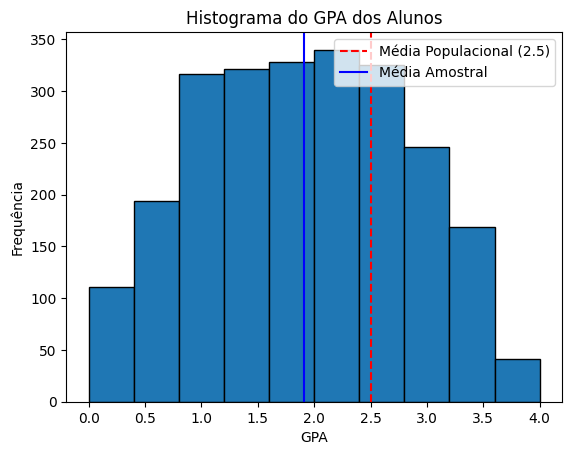

In [29]:
# 7. Criar o histograma
plt.hist(df_colunas['GPA'], bins=10, edgecolor='black')  # Cria um histograma da coluna 'GPA' com 10 barras (bins) e bordas pretas.
plt.xlabel('GPA')  # Define o rótulo do eixo X do histograma como 'GPA'.
plt.ylabel('Frequência')  # Define o rótulo do eixo Y do histograma como 'Frequência'.
plt.title('Histograma do GPA dos Alunos')  # Define o título do histograma como 'Histograma do GPA dos Alunos'.

# Adicionar as linhas verticais para a média populacional e a média amostral
plt.axvline(hipotese_nula, color='red', linestyle='--', label='Média Populacional (2.5)')  # Adiciona uma linha vertical vermelha tracejada para a média populacional (2.5) com a legenda 'Média Populacional (2.5)'.
plt.axvline(df_colunas['GPA'].mean(), color='blue', linestyle='-', label='Média Amostral')  # Adiciona uma linha vertical azul sólida para a média amostral com a legenda 'Média Amostral'.

plt.legend()  # Mostra a legenda com as informações sobre as linhas verticais.
plt.show()  # Exibe o histograma com as linhas verticais.

**TESTE Z**

In [13]:
df2 = pd.read_csv('enem_2019.csv')
df2

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.9,466.0,497.3,369.1,780.0,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.9,495.4,482.3,416.5,600.0,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.2,538.7,582.6,571.5,640.0,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,6,4990.00 até 5988.00,458.8,380.6,493.1,396.7,800.0,BA,SALVADOR,2927408


In [14]:
df2.columns

Index(['inscricao', 'idade', 'sexo', 'conclusao_ens_med', 'tipo_ens_med',
       'treineiro', 'cadeira_canhoto', 'gestante', 'idoso',
       'celular_na_residencia', 'internet_na_residencia',
       'pessoas_na_residencia', 'renda_mensal_familiar', 'nota_ct', 'nota_ch',
       'nota_lc', 'nota_mt', 'nota_redacao', 'estado', 'municipio',
       'municipio_id'],
      dtype='object')

In [15]:
df2_colunas = df2[['idade', 'sexo']]
df2_colunas

,idade,sexo
0,21,M
1,16,F
2,18,F
3,23,M
4,23,M
...,...,...
5095265,28,F
5095266,25,M
5095267,18,F
5095268,16,M


**TESTE DE HIPÓTESES** 

H0: média de idade das mulheres que fizeram enem é 20 anos

H1: média de idade das mulheres que fizeram enem é maior que 20 anos

In [16]:
df_mulheres = df2_colunas[df2_colunas["sexo"] == "F"]
df_mulheres

,idade,sexo
1,16,F
2,18,F
6,30,F
7,26,F
9,17,F
...,...,...
5095262,22,F
5095264,30,F
5095265,28,F
5095267,18,F


In [17]:
df2['idade'].mean()

22.08743069552742

In [18]:
idades_mulheres = df_mulheres["idade"].values
idades_mulheres

array([16, 18, 30, ..., 28, 18, 25], dtype=int64)

In [19]:
x = len(df_mulheres[df_mulheres["idade"] > 20])

In [20]:
media_hipotese_nula = 20
p0= 0.5
nivel_significancia = 0.05
n = len(df_mulheres)

# Calcular o desvio padrão da amostra
desvio_padrao_amostra = np.std(idades_mulheres)

# Usar o desvio padrão da amostra como uma estimativa do desvio padrão populacional
desvio_padrao_populacional = desvio_padrao_amostra

não consegui importar as bibliotecas de jeito nenhum, continuei a análise pelo collab, através do link:
https://colab.research.google.com/drive/1J2sdvMV03euIZY5gx-pe63WBz0eByHqC#scrollTo=lkVLqS3UzOaJ

In [22]:
from statsmodels.stats.proportion import proportions_ztest

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')
stat, p_value

NameError: name 'proportions_ztest' is not defined